# Finance Podcasts - Analysing the Episodes

### This will be an attempt to analyse the episodes of personal finance podcasts data downloaded using the [Spotify](https://developer.spotify.com/) API  

In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
print("Done")

Done


In [2]:
df = pd.read_csv('fin_episodes.csv', index_col=0)
df.head()

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,0ntJn4yJVV4umVjwnGKRgn,2624052,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,5rlksOLniypAgBEkebMkoo
1,55Fkq503PHqrk2sDFgSJkJ,2568620,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,5rlksOLniypAgBEkebMkoo
2,6mPZv163rYpSGxeU22jZMx,2126968,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,5rlksOLniypAgBEkebMkoo
3,6MmCicD7bBdyCX4eiGceCj,2214922,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,5rlksOLniypAgBEkebMkoo
4,0x5QHf5oHj0kszmhZ4mYSM,1625287,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,5rlksOLniypAgBEkebMkoo


In [3]:
df['ep_duration'] = (df['ep_duration']/60000).astype(int) #convert episode duration to minutes
df

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,0ntJn4yJVV4umVjwnGKRgn,43,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,5rlksOLniypAgBEkebMkoo
1,55Fkq503PHqrk2sDFgSJkJ,42,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,5rlksOLniypAgBEkebMkoo
2,6mPZv163rYpSGxeU22jZMx,35,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,5rlksOLniypAgBEkebMkoo
3,6MmCicD7bBdyCX4eiGceCj,36,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,5rlksOLniypAgBEkebMkoo
4,0x5QHf5oHj0kszmhZ4mYSM,27,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,5rlksOLniypAgBEkebMkoo
...,...,...,...,...,...,...,...
27849,3Ze8QJfFVtOq7K4t5MMdVN,36,2020-04-03,Almost Abstract Outdoor News - 3rd April 2020,We Get Outdoors decided to take things to a ne...,https://p.scdn.co/mp3-preview/694912c7e74c56aa...,51l9jW0oK963nzZyWrNrKU
27850,33g0vk9HRLErnQZqagv9fB,57,2020-03-31,How I survived 3 Naked and Afraid Challenges w...,"In this episode, EJ and Mark discuss how to su...",https://p.scdn.co/mp3-preview/bde07774ad150a70...,51l9jW0oK963nzZyWrNrKU
27851,6JfpyNA2Eoq49Kg3P3wUP8,12,2020-03-30,COVID 19 - Get Outdoors Safely with Rob Yates,In this first episode We Get Outdoors co-found...,https://p.scdn.co/mp3-preview/2174eff0157e07e4...,51l9jW0oK963nzZyWrNrKU
27852,4jJLYKenuKJ39sxCTz6XRG,66,2020-03-24,How To Sail around the World with Sailing Magi...,This episode is brought to you by the We Get O...,https://p.scdn.co/mp3-preview/c86d6ea6d929b98e...,51l9jW0oK963nzZyWrNrKU


In [4]:
df['ep_duration'].describe() #summary stats for the episode duration column

count    27854.000000
mean        32.262260
std         22.059156
min          0.000000
25%         14.000000
50%         30.000000
75%         46.000000
max        234.000000
Name: ep_duration, dtype: float64

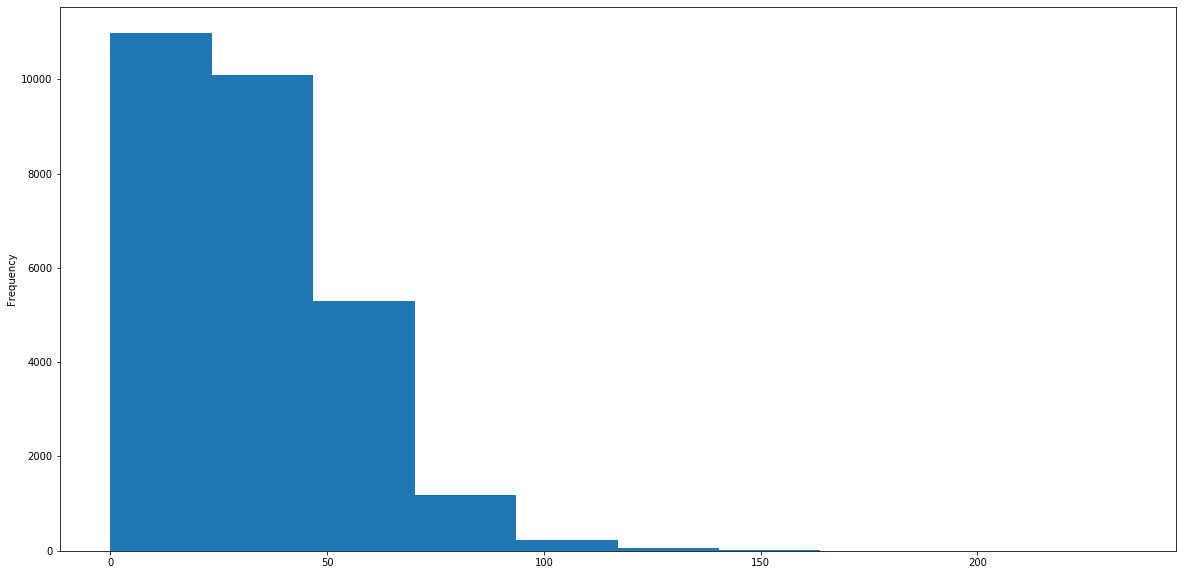

In [6]:
plt.figure(figsize=(20,10))
df['ep_duration'].plot(kind='hist')
plt.savefig('eps_duration.png'); #distribution of episode lenghts at this stage

In [7]:
df_fin = pd.read_csv('en_podcasts.csv',index_col=0)
df_fin.head()

,id,name,description,languages,publisher
2,5rlksOLniypAgBEkebMkoo,Rich Dad Radio Show: In-Your-Face Advice on In...,"Beat conventional advice on personal finance, ...",['en'],The Rich Dad Radio Network
3,54VydTdMDHkfqPqzlwRJFa,Listen Money Matters - Free your inner financi...,Honest and uncensored - this is not your fathe...,['en'],ListenMoneyMatters.com | Andrew Fiebert and Ma...
5,6o8lC0CcRlIclZsbkEOaRL,Optimal Finance Daily,Why bother searching for the best blogs about ...,['en'],Dan | Optimal Living Daily
7,3oW8SnmePemy5pOsTTvQjY,Self Help for Life Podcast: Self-Improvement |...,Paul Thomas from the Self Help for Life blog s...,['en-GB'],"Paul Thomas : Clinical Hypnotherapist, Life an..."
8,49an3JD6uAaqEw5qQS8tie,My Personal Finances PodCat,PodCat is a weekly financial podcast helping y...,['en'],My Personal Finances


In [9]:
show_names = df_fin['name'].value_counts()
show_names

Stuff They Should've Taught Us                      4
Motley Fool Answers                                 4
Masterlife's Podcast                                3
The Young Money Podcast                             3
Women and Wealth                                    3
                                                   ..
NET WORTHWHILE™ by SignatureFD                      1
Gather Happy                                        1
START - UP COACH WITH QUEEN THERESA                 1
Coronomics with Matt Starolis                       1
Simple Money Podcast - Canadian Personal Finance    1
Name: name, Length: 1558, dtype: int64

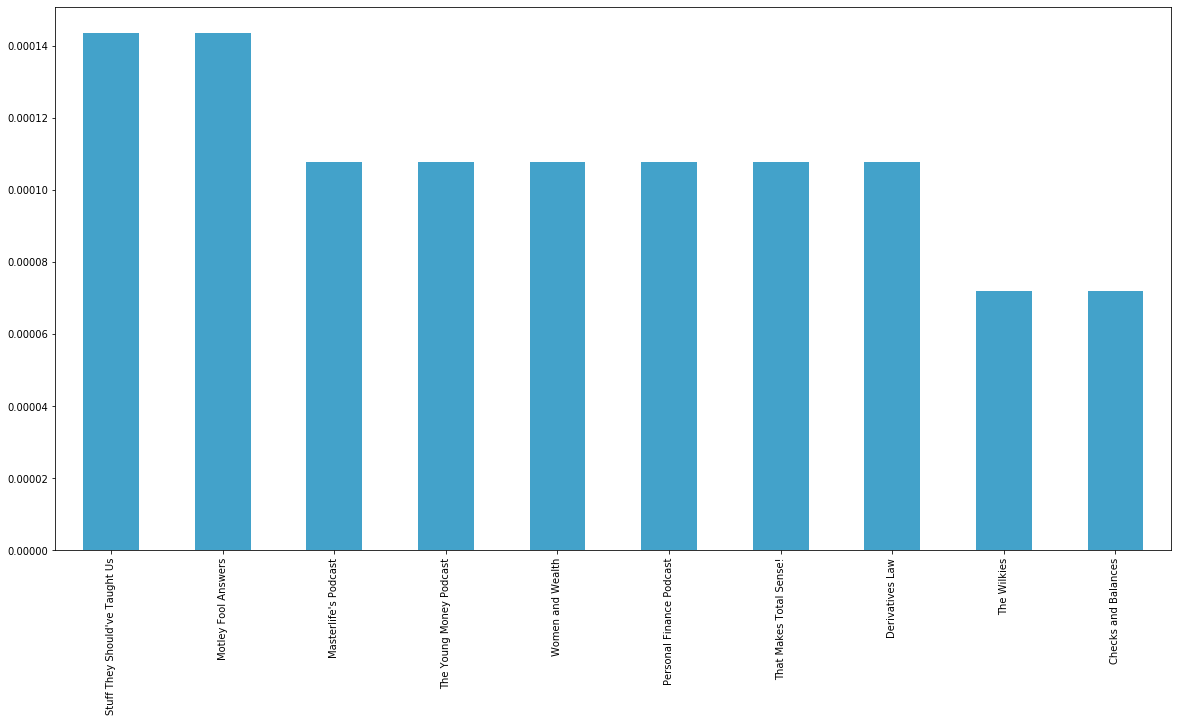

In [12]:
plt.figure(figsize=(20,10))
(show_names[:10]/df.shape[0]).plot(kind='bar', color='#43a2ca')
plt.savefig('top_shows.png');